<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/normal_distribution1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sn

In [2]:
#@title (1) Outlier detection and removal using Standard Deviation
df = pd.read_csv("/content/sample_data/heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

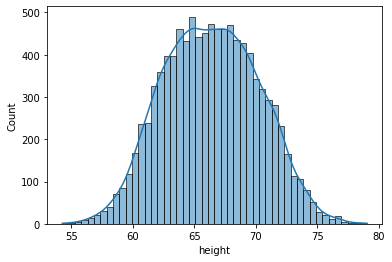

In [4]:
sn.histplot(df.height, kde=True)

In [5]:
mean = df.height.mean()
mean

66.3675597548656

In [6]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [7]:
mean-3*std_deviation

54.824975392478876

In [8]:
mean+3*std_deviation

77.91014411725232

In [9]:
df[(df.height < 54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [10]:
#@title (2) Outlier detection and removal using Z Score  Z score is a way to achieve same thing that we did above in part (1)  Z score indicates how many standard deviation away a data point is.  For example in our case mean is 66.37 and standard deviation is 3.84.  If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)  Calculate the Z Score    Let's add a new column in our dataframe for this Z score
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_no_outlier.shape

(9993, 2)

In [11]:
#@title Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [12]:
df.height.mean()

66.3675597548656

In [13]:
df.height.std()

3.847528120795573

In [14]:
(73.84-66.37)/3.84

1.9453124999999998

In [15]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [16]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
